In [1]:
import sympy
import pandas as pd
from tqdm import tqdm

from symcircuit.symbolic_solver.domains import ExperimentResult
from symcircuit.sizing.visualizer import Visualizer

# Load the Past Run Results

In [2]:
results = ExperimentResult("VLSI_CMMF_POST_EXPERIMENT")
dir_of_results = results.find_results_file("../../../scripts/Runs/VLSI_CMMF_Automated_NA")
results = results.load(f"{dir_of_results[0]}/results.pkl")

In [3]:
classifications_of_intrest = results.classifications_dict["Z1_Z2_Z3_Z4_Z5_Z6"]
len(classifications_of_intrest), classifications_of_intrest[0]

(4096,
 FilterClassification(False, X-INVALID-ORDER, None)(R_1, R_2, R_3, R_4, R_5, R_6), R_1*R_2*R_4*R_6/(R_1*R_4*R_5 - R_2*R_3*R_4 + R_2*R_3*R_5 + R_2*R_4*R_5 + R_3*R_4*R_5))

In [4]:
classifications_of_intrest = []

for key in results.classifications_dict.keys():
    classifications = results.classifications_dict[key]

    classifications_of_intrest += ([classification 
                                for classification in classifications 
                                if (classification.fType in ["BP"] )]
                                )
    
    fTypes = set(classification.fType for classification in classifications_of_intrest)

len(classifications_of_intrest), fTypes

(279, {'BP'})

# Visulization

## Using Only TF

In [5]:
idx = 6
tf = classifications_of_intrest[idx].transferFunc
classifications_of_intrest[idx].zCombo

(R_1, R_2, 1/(C_3*s), R_4, R_5, R_6/(C_6*R_6*s + 1))

In [6]:
viz = Visualizer(tf=tf)
print(viz.is_defined_numerically())
viz.get_parameters()


False


['C_3', 'C_6', 'R_1', 'R_2', 'R_4', 'R_5', 'R_6']

In [7]:
viz.tf

C_3*R_1*R_2*R_4*R_6*s/(-R_2*R_4 + R_2*R_5 + R_4*R_5 + s**2*(C_3*C_6*R_1*R_4*R_5*R_6 + C_3*C_6*R_2*R_4*R_5*R_6) + s*(C_3*R_1*R_4*R_5 + C_3*R_2*R_4*R_5 - C_6*R_2*R_4*R_6 + C_6*R_2*R_5*R_6 + C_6*R_4*R_5*R_6))

In [8]:
viz.set_equal_c()

C*R_1*R_2*R_4*R_6*s/(-R_2*R_4 + R_2*R_5 + R_4*R_5 + s**2*(C**2*R_1*R_4*R_5*R_6 + C**2*R_2*R_4*R_5*R_6) + s*(C*R_1*R_4*R_5 + C*R_2*R_4*R_5 - C*R_2*R_4*R_6 + C*R_2*R_5*R_6 + C*R_4*R_5*R_6))

In [9]:
viz.get_parameters()

['C', 'R_1', 'R_2', 'R_4', 'R_5', 'R_6']

In [10]:
viz.set_equal_r()

C*R**4*s/(2*C**2*R**4*s**2 + 3*C*R**3*s + R**2)

In [11]:
viz.get_parameters()

['C', 'R']

In [12]:
viz.set_params({
    "C" : 1e-9,
    "R" : 1e3
})

{s: 2*I*pi*f, C: 1e-09, R: 1000.0}

In [13]:
viz.eval_freq(10)

(-24.03640271856399, 89.98920000004264)

2025-01-23 02:27:46,220 - matplotlib.pyplot - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-01-23 02:27:46,221 - matplotlib.pyplot - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-01-23 02:27:46,223 - matplotlib.font_manager - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-01-23 02:27:46,223 - matplotlib.font_manager - findfont: score(FontEntry(fname='/Users/danialnoorizadeh/.pyenv/versions/myenv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-01-23 02:27:46,223 - matplotlib.font_manager - findfont: score(FontEntry(fname='/Users/danialnoorizadeh/.pyenv/versions/myenv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal

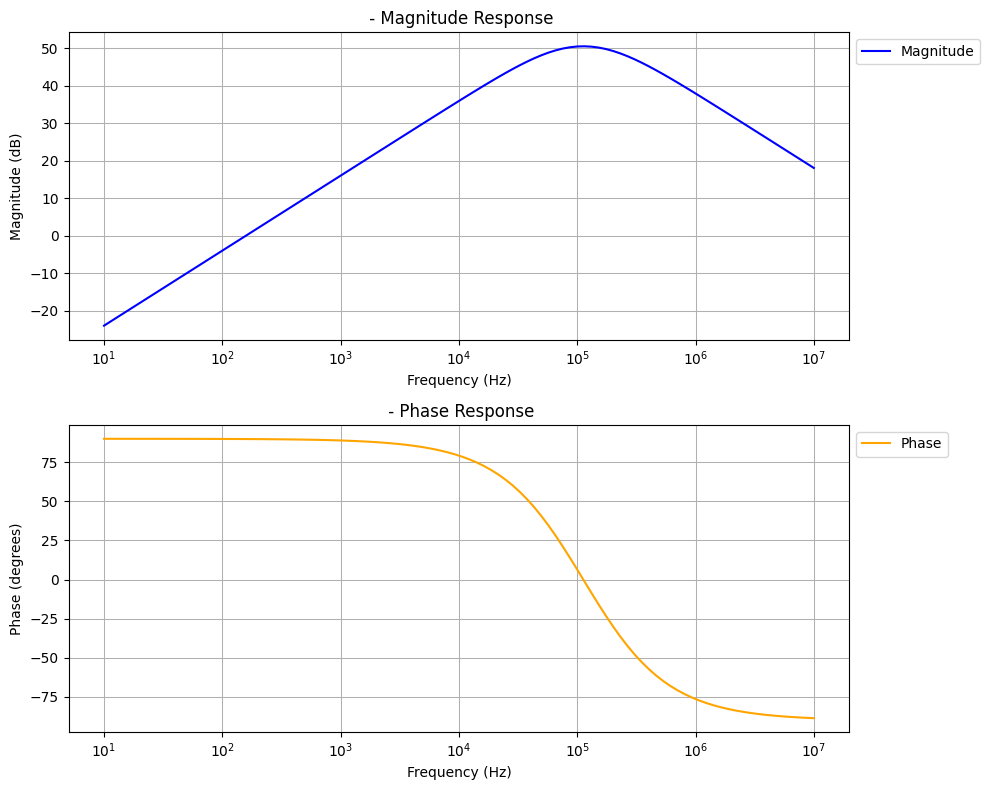

In [14]:
viz.visualize()

## Using Filter_Classification Class

In [15]:
idx = 1
viz = Visualizer(filter_classification=classifications_of_intrest[idx])

In [16]:
viz.set_equal_c()
viz.set_equal_r()
viz.set_params({
    "R" : 1e3,
    "C" : 1e-9
})
viz.eval_filter_parameter("Q")

(2*sqrt(3)/7, 0.495)

In [17]:
viz.tf_original

C_5*R_1*R_2*R_4*R_6*s/(R_1*R_4 + R_2*R_3 + R_2*R_4 + R_3*R_4 + s**2*(C_5*C_6*R_1*R_4*R_5*R_6 - C_5*C_6*R_2*R_3*R_4*R_6 + C_5*C_6*R_2*R_3*R_5*R_6 + C_5*C_6*R_2*R_4*R_5*R_6 + C_5*C_6*R_3*R_4*R_5*R_6) + s*(C_5*R_1*R_4*R_5 - C_5*R_2*R_3*R_4 + C_5*R_2*R_3*R_5 + C_5*R_2*R_4*R_5 + C_5*R_3*R_4*R_5 + C_6*R_1*R_4*R_6 + C_6*R_2*R_3*R_6 + C_6*R_2*R_4*R_6 + C_6*R_3*R_4*R_6))

In [18]:
viz.tf

C*R**4*s/(3*C**2*R**4*s**2 + 7*C*R**3*s + 4*R**2)

2025-01-23 02:27:54,839 - matplotlib.ticker - vmin 3.548133892335755 vmax 28183829312.644493
2025-01-23 02:27:54,840 - matplotlib.ticker - ticklocs array([1.e-02, 1.e+00, 1.e+02, 1.e+04, 1.e+06, 1.e+08, 1.e+10, 1.e+12,
       1.e+14])
2025-01-23 02:27:54,843 - matplotlib.ticker - vmin 3.548133892335755 vmax 28183829312.644493
2025-01-23 02:27:54,843 - matplotlib.ticker - ticklocs array([1.e-02, 1.e+00, 1.e+02, 1.e+04, 1.e+06, 1.e+08, 1.e+10, 1.e+12,
       1.e+14])
2025-01-23 02:27:54,843 - matplotlib.ticker - vmin 3.548133892335755 vmax 28183829312.644493
2025-01-23 02:27:54,844 - matplotlib.ticker - ticklocs array([1.e-02, 1.e+00, 1.e+02, 1.e+04, 1.e+06, 1.e+08, 1.e+10, 1.e+12,
       1.e+14])
2025-01-23 02:27:54,844 - matplotlib.ticker - vmin 3.548133892335755 vmax 28183829312.644493
2025-01-23 02:27:54,844 - matplotlib.ticker - ticklocs array([1.e-02, 1.e+00, 1.e+02, 1.e+04, 1.e+06, 1.e+08, 1.e+10, 1.e+12,
       1.e+14])
2025-01-23 02:27:54,856 - matplotlib.ticker - vmin 3.5481338

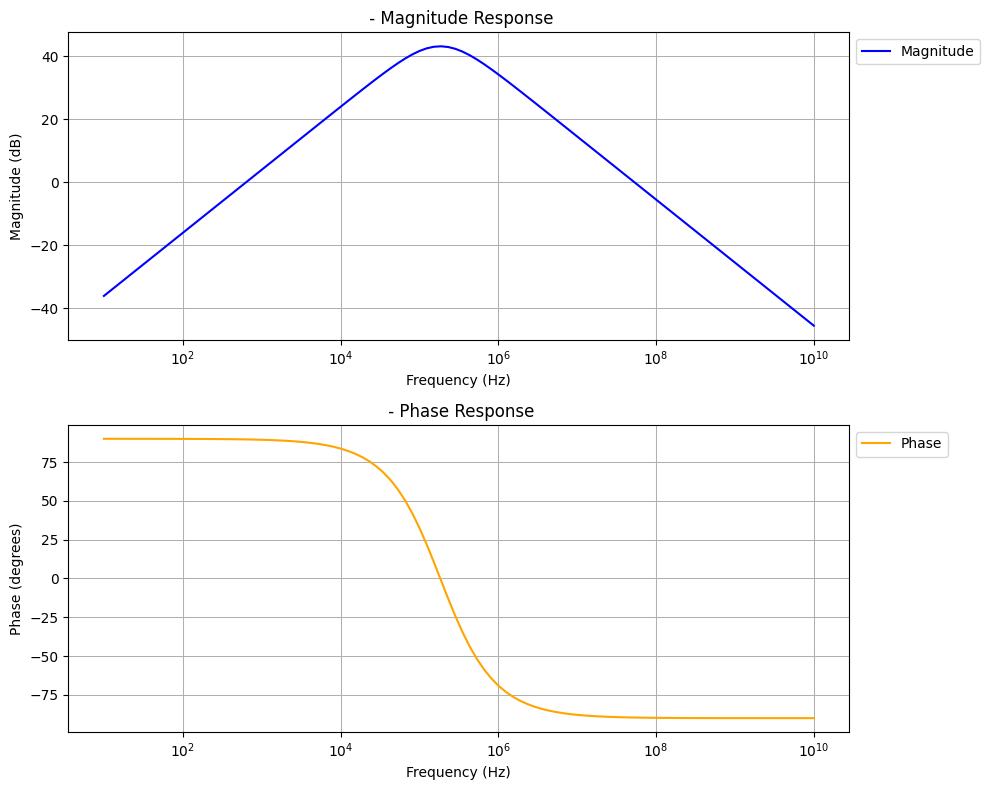

In [19]:
viz.visualize(end_freq_order=10)

In [20]:
viz.eval_filter_parameter("Q")

(2*sqrt(3)/7, 0.495)

In [21]:
viz.eval_filter_parameter("wo")[1] / (2*3.14)

183869.51242038215